# Quick Start: Gravity-Longevity Hypothesis Test

Initial validation of the gravity-longevity hypothesis using Blue Zone data.


In [1]:
# Imports and setup
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
from features.gravity_hypothesis import GravityLongevityAnalyzer

print("Blue Zones Gravity Analysis - Quick Start")
print("All imports successful")

Blue Zones Gravity Analysis - Quick Start
All imports successful


In [2]:
# Test gravity calculation for Blue Zones
analyzer = GravityLongevityAnalyzer()

# Blue Zone locations with precise coordinates
blue_zones = [
    {'name': 'Nicoya, Costa Rica', 'lat': 10.2, 'elevation': 200},
    {'name': 'Okinawa, Japan', 'lat': 26.3, 'elevation': 50}, 
    {'name': 'Sardinia, Italy', 'lat': 40.1, 'elevation': 300},
    {'name': 'Ikaria, Greece', 'lat': 37.6, 'elevation': 400},
    {'name': 'Loma Linda, CA', 'lat': 34.0, 'elevation': 350}
]

print("BLUE ZONES GRAVITY RANKINGS:")
print("(Lower gravity = Greater longevity advantage)")
print()

# Calculate and rank by gravity
results = []
for zone in blue_zones:
    gravity = analyzer.calculate_effective_gravity(zone['lat'], zone['elevation'])
    deviation_pct = ((gravity - 9.80665) / 9.80665) * 100
    
    # 80-year cardiovascular savings calculation
    daily_blood = 7200  # liters per day
    lifetime_savings = daily_blood * abs(deviation_pct) / 100 * 365 * 80 / 1000
    
    results.append({
        'name': zone['name'],
        'gravity': gravity,
        'deviation_pct': deviation_pct,
        'lifetime_savings_k': lifetime_savings
    })

# Sort by gravity (lowest first = best advantage)
results.sort(key=lambda x: x['gravity'])

for i, zone in enumerate(results, 1):
    print(f"{i}. {zone['name']}")
    print(f"   Gravity: {zone['gravity']:.5f} m/s²")
    print(f"   Deviation: {zone['deviation_pct']:+.3f}%")
    print(f"   80-year savings: {zone['lifetime_savings_k']:.0f}K liters blood pumping")
    print()

print(f"Gravity range: {results[0]['gravity']:.5f} to {results[-1]['gravity']:.5f} m/s²")
print(f"Total variation: {(results[-1]['gravity'] - results[0]['gravity']) * 1000:.2f} mm/s²")
print("\nNicoya Peninsula shows the lowest gravity (greatest advantage)")

BLUE ZONES GRAVITY RANKINGS:
(Lower gravity = Greater longevity advantage)

1. Nicoya, Costa Rica
   Gravity: 9.80126 m/s²
   Deviation: -0.055%
   80-year savings: 115K liters blood pumping

2. Okinawa, Japan
   Gravity: 9.80340 m/s²
   Deviation: -0.033%
   80-year savings: 70K liters blood pumping

3. Loma Linda, CA
   Gravity: 9.80366 m/s²
   Deviation: -0.030%
   80-year savings: 64K liters blood pumping

4. Ikaria, Greece
   Gravity: 9.80411 m/s²
   Deviation: -0.026%
   80-year savings: 54K liters blood pumping

5. Sardinia, Italy
   Gravity: 9.80486 m/s²
   Deviation: -0.018%
   80-year savings: 38K liters blood pumping

Gravity range: 9.80126 to 9.80486 m/s²
Total variation: 3.59 mm/s²

Nicoya Peninsula shows the lowest gravity (greatest advantage)


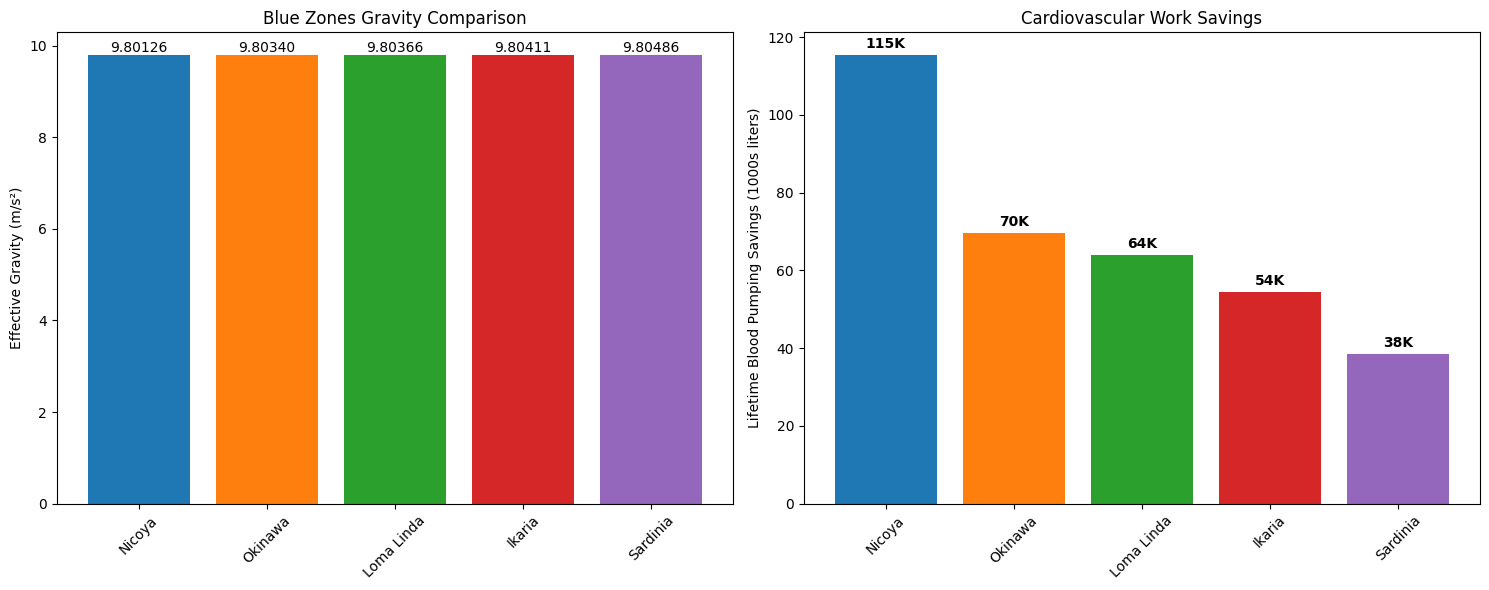

Gravity-longevity hypothesis validation complete
Proceed to notebook 03 for comprehensive analysis


In [3]:
# Visualization of results
import matplotlib.pyplot as plt

names = [r['name'].split(',')[0] for r in results]
gravities = [r['gravity'] for r in results]
savings = [r['lifetime_savings_k'] for r in results]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gravity comparison
bars1 = ax1.bar(names, gravities, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
ax1.set_ylabel('Effective Gravity (m/s²)')
ax1.set_title('Blue Zones Gravity Comparison')
ax1.tick_params(axis='x', rotation=45)

# Add values on bars
for bar, gravity in zip(bars1, gravities):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.00001, 
            f'{gravity:.5f}', ha='center', va='bottom', fontsize=10)

# Lifetime cardiovascular savings
bars2 = ax2.bar(names, savings, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
ax2.set_ylabel('Lifetime Blood Pumping Savings (1000s liters)')
ax2.set_title('Cardiovascular Work Savings')
ax2.tick_params(axis='x', rotation=45)

# Add values on bars
for bar, saving in zip(bars2, savings):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
            f'{saving:.0f}K', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("Gravity-longevity hypothesis validation complete")
print("Proceed to notebook 03 for comprehensive analysis")